# Practical 12
## AIM : Performing naive bayes and SVM classification on the iris dataset.

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [56]:
iris = load_iris()
X = iris.data[:, :2]  # Use only sepal length and width for visualization
y = iris.target
target_names = iris.target_names

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)

In [59]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

In [60]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = nb.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

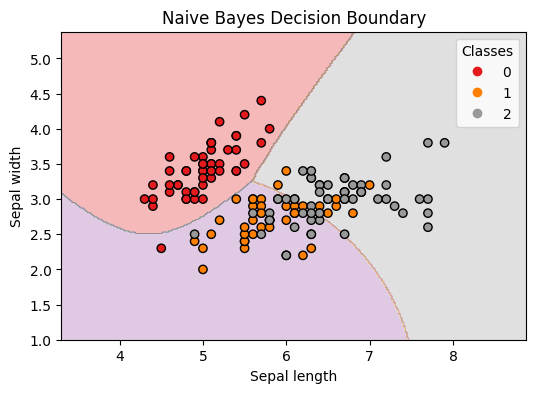

In [61]:
plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("Naive Bayes Decision Boundary")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

In [62]:
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

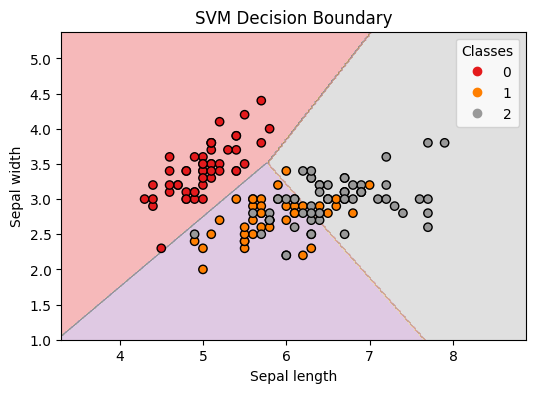

In [63]:
plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM Decision Boundary")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

<Figure size 300x200 with 0 Axes>

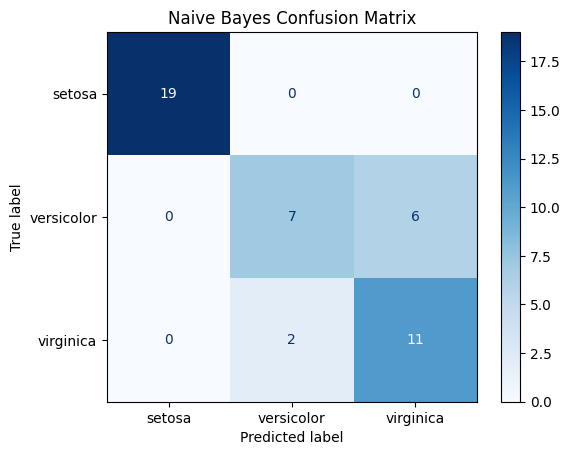

In [64]:
plt.figure(figsize=(3, 2))
cm_nb = confusion_matrix(y_test, nb_preds)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=target_names)
disp_nb.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

<Figure size 300x200 with 0 Axes>

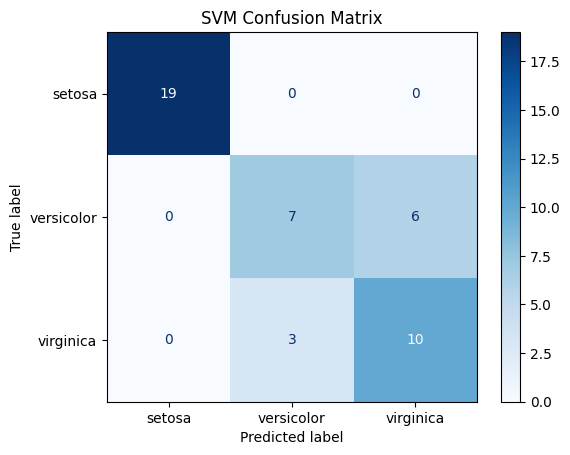

In [65]:
plt.figure(figsize=(3, 2))
cm_svm = confusion_matrix(y_test, svm_preds)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=target_names)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.show()